<a href="https://colab.research.google.com/github/nandhukumar86/CapstonePneumoniaDetection/blob/main/Pneumonia_Detection_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upgrading pip in Colab

In [1]:
! pip install --upgrade pip
! pip uninstall kaggle
! pip install kaggle

y
y
y
y
     |████████████████████████████████| 1.6MB 14.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.7/dist-packages/kaggle-1.5.12.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 58 kB 4.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=5fa496044a8337af0460bf501246f61ab93e5a62dbdace711f952eef52ca3c10
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


# Connecting Kaggle

In [2]:
# install kaggle
! pip install -q kaggle

# upload file to Colab
from google.colab import files
files.upload()

# create kaggle folder in root and copy the file.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# provide permissions
! chmod 600 ~/.kaggle/kaggle.json

# download competition files by providing competition name
! kaggle competitions download -c 'rsna-pneumonia-detection-challenge'

# unzip the files and folders
#! unzip train.csv.zip -d train
#! unzip test.csv.zip -d test


Saving kaggle.json to kaggle.json
100% 3.65G/3.66G [00:54<00:00, 66.4MB/s]
100% 3.66G/3.66G [00:54<00:00, 72.0MB/s]


In [ ]:
! unzip '/content/rsna-pneumonia-detection-challenge.zip' -d dataset

# Basic Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [5]:
dfClassInfo = pd.read_csv('/content/dataset/stage_2_detailed_class_info.csv')
dfLabels = pd.read_csv('/content/dataset/stage_2_train_labels.csv')

In [6]:
dfClassInfo.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [7]:
dfLabels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


# EDA

In [8]:
print('\nColumns:\n',dfClassInfo.columns)
print('\nData types:\n',dfClassInfo.dtypes)
print('\nSize:\n',dfClassInfo.size)
print('\nShape:\n',dfClassInfo.shape)
print('\nNull checks:\n',dfClassInfo.isnull().sum())
print('\nDescribe:\n',dfClassInfo.describe().T)



Columns:
 Index(['patientId', 'class'], dtype='object')

Data types:
 patientId    object
class        object
dtype: object

Size:
 60454

Shape:
 (30227, 2)

Null checks:
 patientId    0
class        0
dtype: int64

Describe:
            count unique                                   top   freq
patientId  30227  26684  0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d      4
class      30227      3          No Lung Opacity / Not Normal  11821


In [9]:
print('\nColumns:\n',dfLabels.columns)
print('\nData types:\n',dfLabels.dtypes)
print('\nSize:\n',dfLabels.size)
print('\nShape:\n',dfLabels.shape)
print('\nNull checks:\n',dfLabels.isnull().sum())
print('\nDescribe:\n',dfLabels.describe().T)



Columns:
 Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

Data types:
 patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object

Size:
 181362

Shape:
 (30227, 6)

Null checks:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Describe:
           count        mean         std   min    25%    50%    75%    max
x        9555.0  394.047724  204.574172   2.0  207.0  324.0  594.0  835.0
y        9555.0  366.839560  148.940488   2.0  249.0  365.0  478.5  881.0
width    9555.0  218.471376   59.289475  40.0  177.0  217.0  259.0  528.0
height   9555.0  329.269702  157.750755  45.0  203.0  298.0  438.0  942.0
Target  30227.0    0.316108    0.464963   0.0    0.0    0.0    1.0    1.0


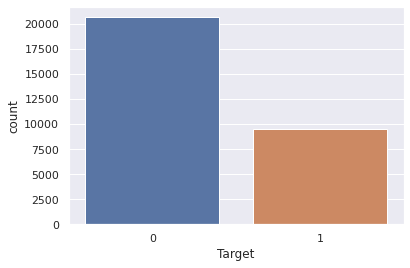

In [10]:
sns.countplot(dfLabels['Target']);

In [11]:
dfLabels['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

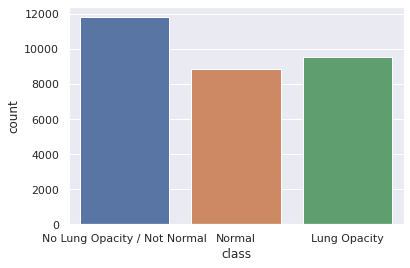

In [12]:
sns.countplot(dfClassInfo['class']);

There are three different classes, two of them can be merged together

In [13]:
dfClassInfo['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [15]:
import os
import shutil

In [16]:
os.rename('/content/dataset/stage_2_test_images','/content/dataset/test')
os.rename('/content/dataset/stage_2_train_images','/content/dataset/train')

Installing pudicom

In [17]:
!pip install pydicom
import pydicom
from pydicom import dcmread

     |████████████████████████████████| 1.9 MB 13.9 MB/s 


# Sample Image

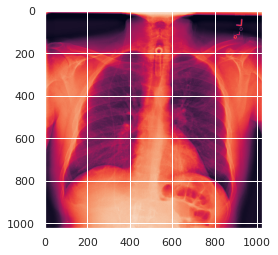

In [18]:
file1 = '/content/dataset/test/001b0c51-c7b3-45c1-9c17-fa7594cab96e.dcm'
img = dcmread(file1)
plt.imshow(img.pixel_array);

In [19]:
img.pixel_array.shape

(1024, 1024)

# Keys available in DICOM file

In [20]:
img.keys

<bound method Dataset.keys of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.24455.1517874454.556022
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.24455.1517874454.556022
(0008, 0020) Study Date                          DA: '19010101'

In [21]:
testFiles = os.listdir('/content/dataset/test')
trainFiles = os.listdir('/content/dataset/train')

# Age and Sex are the significant properties in DICOM file

In [22]:
data = {}
dfTrainData = pd.DataFrame(data, columns=['PatientID','Age', 'Sex'])

data1 = {}
dfTestData = pd.DataFrame(data1, columns=['PatientID','Age', 'Sex'])

In [23]:
datasetFolder = '/content/dataset/'

i = 0
for file in trainFiles:
  img = dcmread(datasetFolder + 'train/' + file)
  dfTrainData.loc[i] = [img.PatientID, img.PatientAge, img.PatientSex]
  i = i + 1
  if (i % 1000 == 0):
    print(i, ' train files completed')

i = 0
for file in testFiles:
  img = dcmread(datasetFolder + 'test/' + file)
  dfTestData.loc[i] = [img.PatientID, img.PatientAge, img.PatientSex]
  i = i + 1
  if (i % 1000 == 0):
    print(i, 'test files completed')

1000  train files completed
2000  train files completed
3000  train files completed
4000  train files completed
5000  train files completed
6000  train files completed
7000  train files completed
8000  train files completed
9000  train files completed
10000  train files completed
11000  train files completed
12000  train files completed
13000  train files completed
14000  train files completed
15000  train files completed
16000  train files completed
17000  train files completed
18000  train files completed
19000  train files completed
20000  train files completed
21000  train files completed
22000  train files completed
23000  train files completed
24000  train files completed
25000  train files completed
26000  train files completed
1000 test files completed
2000 test files completed
3000 test files completed


In [24]:
dfTrainData.shape, dfTestData.shape

((26684, 3), (3000, 3))

# Distribution of Age

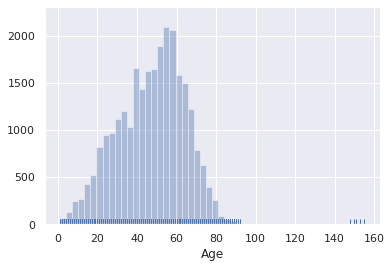

In [25]:
sns.distplot(dfTrainData['Age'], kde=False, rug=True);

There are some age more than 100

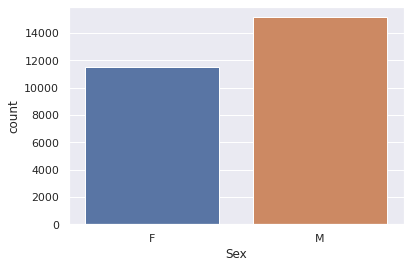

In [65]:
sns.countplot(dfTrainData['Sex'])

In [27]:
dfClassInfo['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [28]:
dfLabels['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

Merging the unwanted class as Normal

In [29]:
dfClassInfo['class'].replace({'No Lung Opacity / Not Normal': 'Normal'}, inplace=True)


In [30]:
dfClassInfo['class'].value_counts()

Normal          20672
Lung Opacity     9555
Name: class, dtype: int64

In [31]:
def getXandY(patientId):
  fileName = patientId +'.dcm'
  absolutePathTrain = datasetFolder + 'train/' + fileName
  absolutePathTest = datasetFolder + 'test/' + fileName
  if (os.path.isfile(absolutePathTrain) == True):
    img = dcmread(absolutePathTrain)
    X,Y = img.pixel_array.shape
  elif (os.path.isfile(absolutePathTest) == True):
    img = dcmread(absolutePathTest)
    X,Y = img.pixel_array.shape
  else: 
    X,Y = np.NaN, np.NaN
  return X, Y

In [32]:
dfImageSize = dfLabels['patientId'].apply(lambda pId : getXandY(pId))

In [33]:
dfLabels['X'] = dfImageSize.apply(lambda x : x[0])
dfLabels['Y'] = dfImageSize.apply(lambda x : x[1])

In [34]:
dfLabels['X'].value_counts()

1024    30227
Name: X, dtype: int64

In [35]:
dfLabels['Y'].value_counts()

1024    30227
Name: Y, dtype: int64

In [36]:
dfLabels.head()

,patientId,x,y,width,height,Target,X,Y
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024


In [37]:
import cv2

In [38]:
compressedImageSize = (256,256)

# Function to Resize the Image to 256x256

In [39]:
def getResize256(patientId):
  fileName = patientId +'.dcm'
  absolutePathTrain = datasetFolder + 'train/' + fileName
  absolutePathTest = datasetFolder + 'test/' + fileName
  if (os.path.isfile(absolutePathTrain) == True):
    img = dcmread(absolutePathTrain)
  elif (os.path.isfile(absolutePathTest) == True):
    img = dcmread(absolutePathTest)
  return cv2.resize(img.pixel_array,(256,256))

In [41]:
dfLabels.head()

,patientId,x,y,width,height,Target,X,Y
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024


In [42]:
dfImages_resized = dfLabels['patientId'].apply(lambda pId : getResize256(pId))

In [50]:
dfLabels['Image256'] = dfImages_resized

# Function to Resize the Coodinates

In [51]:
def custom_resize_target(X, Y, x, y, l, b, Xo = 256, Yo = 256):
  X_ratio = (Xo/X) 
  Y_ratio = (Yo/Y) 
  xo = X_ratio * x
  yo = Y_ratio * y
  lo = X_ratio * l
  bo = Y_ratio * b
  return Xo, Yo, xo, yo, lo, bo

In [52]:
reshapedTargets = dfLabels.apply(lambda row: custom_resize_target(1024,1024,row['x'], row['y'], row['width'],row['height']),axis= 1)

In [53]:
def toInt(x):
  if (x == np.NaN):
    return np.NaN
  else:
    return np.ceil(x)

In [54]:
dfLabels['Xo'] = reshapedTargets.map(lambda x: x[0])
dfLabels['Yo'] = reshapedTargets.map(lambda x: x[1])
dfLabels['xo'] = reshapedTargets.map(lambda x: x[2])
dfLabels['yo'] = reshapedTargets.map(lambda x: x[3])
dfLabels['widtho'] = reshapedTargets.map(lambda x: x[4])
dfLabels['heighto'] = reshapedTargets.map(lambda x: x[5])

In [56]:
dfLabels['xo'] = dfLabels.apply(lambda row: toInt(row['xo']),axis = 1)
dfLabels['yo'] = dfLabels.apply(lambda row: toInt(row['yo']),axis = 1)
dfLabels['widtho'] = dfLabels.apply(lambda row: toInt(row['widtho']),axis = 1)
dfLabels['heighto'] = dfLabels.apply(lambda row: toInt(row['heighto']),axis = 1)

In [69]:
def getAgeandSex(patientId):
  fileName = patientId +'.dcm'
  absolutePathTrain = datasetFolder + 'train/' + fileName
  absolutePathTest = datasetFolder + 'test/' + fileName
  if (os.path.isfile(absolutePathTrain) == True):
    img = dcmread(absolutePathTrain)
  elif (os.path.isfile(absolutePathTest) == True):
    img = dcmread(absolutePathTest)
  return int(img.PatientAge), img.PatientSex

In [70]:
dfAgeSex = dfLabels['patientId'].apply(lambda pId : getAgeandSex(pId))

In [72]:
dfLabels['Age'] = dfAgeSex.apply(lambda x : x[0])
dfLabels['Sex'] = dfAgeSex.apply(lambda x : x[1])

In [73]:
dfLabels.head()

,patientId,x,y,width,height,Target,X,Y,Image256,Xo,Yo,xo,yo,widtho,heighto,Age,Sex
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,"[[92, 50, 30, 17, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4...",256,256,NaN,NaN,NaN,NaN,51,F
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,"[[20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",256,256,NaN,NaN,NaN,NaN,48,F
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,"[[18, 16, 15, 15, 14, 14, 13, 14, 14, 14, 14, ...",256,256,NaN,NaN,NaN,NaN,19,M
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,"[[205, 202, 193, 192, 187, 185, 180, 179, 177,...",256,256,NaN,NaN,NaN,NaN,28,M
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,"[[2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 5,...",256,256,66.0,38.0,54.0,95.0,32,F


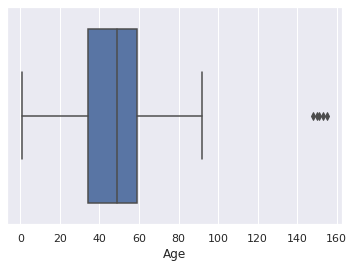

In [75]:
sns.boxplot(x="Age", data=dfLabels)

There are outliers avaialble in Age

In [119]:
import pickle

file = open('/content/drive/MyDrive/CapstoneDataSet/dataset/RezisedLabel.pickle', 'ab')
pickle.dump(dfLabels, file)                     
file.close()
